In [1]:
import sys  
sys.path.append("../time_series")  
sys.path.append("../anomaly_detection_methods")

import anomaly_detection_methods_helpers as ah
from glim_method import glim
from time_series import TimeSeries
from os import listdir
from os.path import isfile, join
import joblib
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
import math
import matplotlib.pyplot as plt
import scipy
import itertools
import statistics 

In [2]:
methods = []
variance_differences = []
cv = []

## Prophet

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


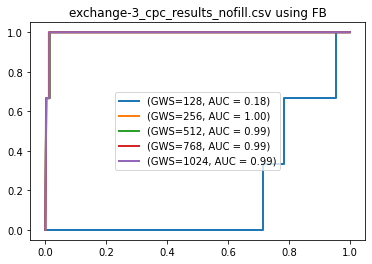

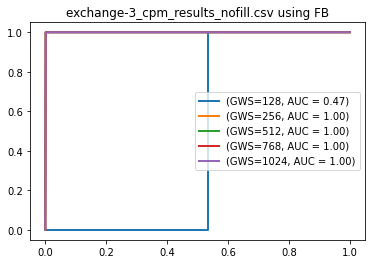

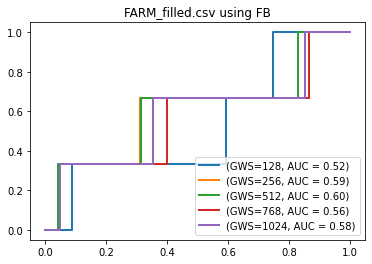

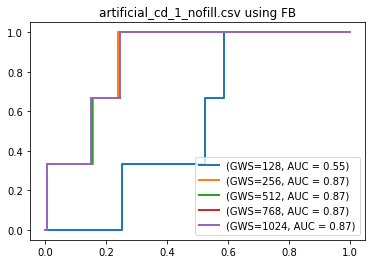

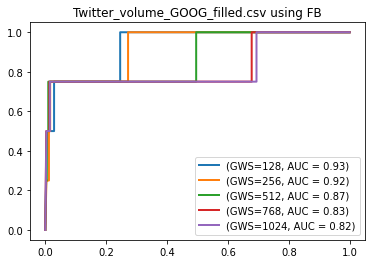

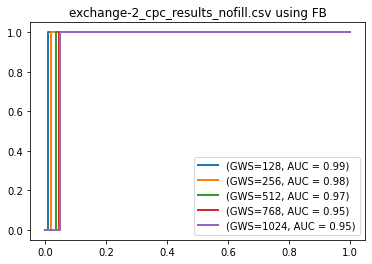

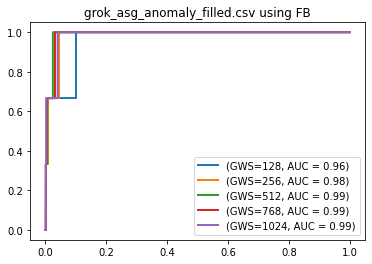

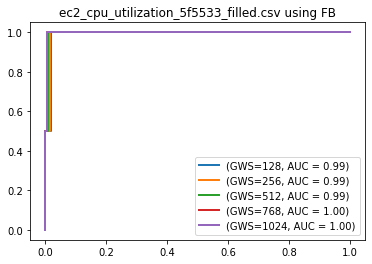

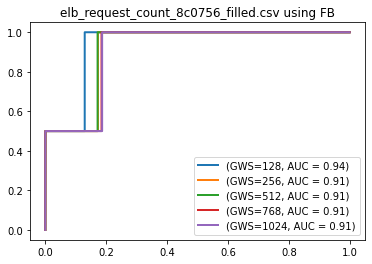

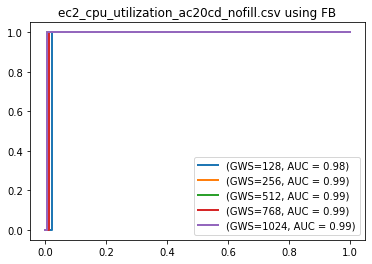

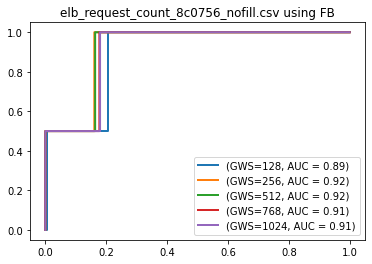

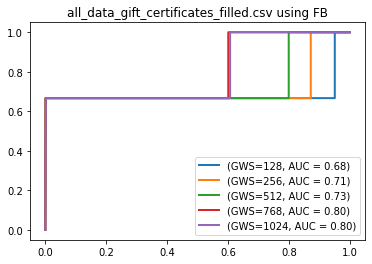

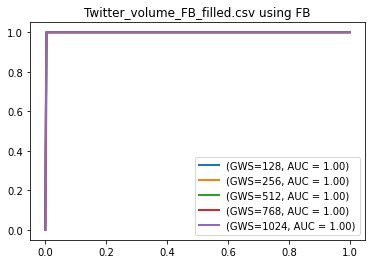

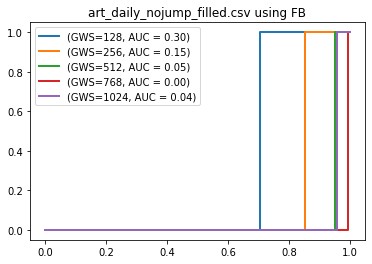

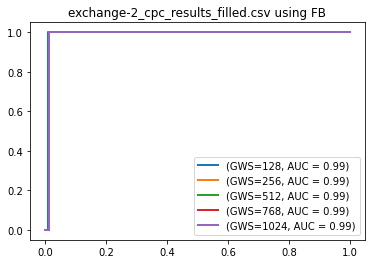

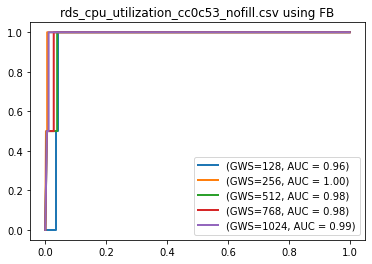

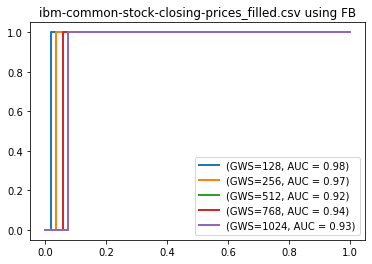

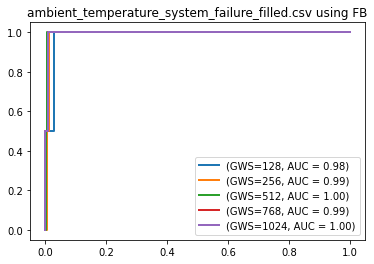

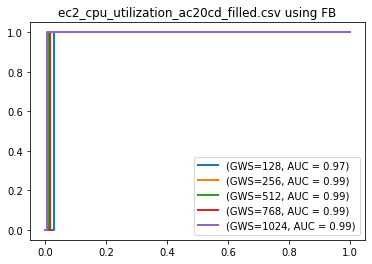

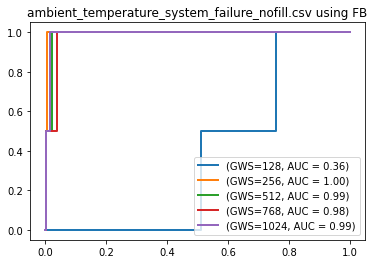

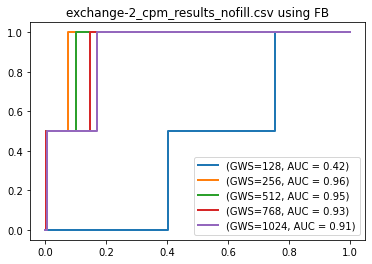

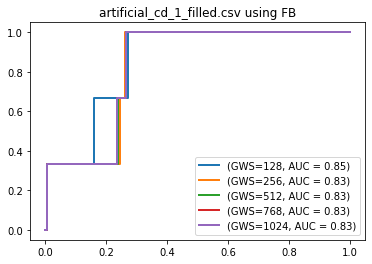

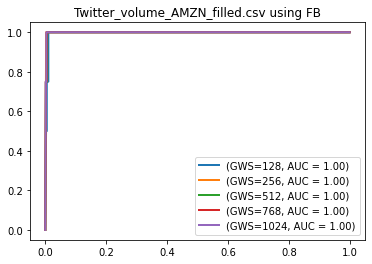

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


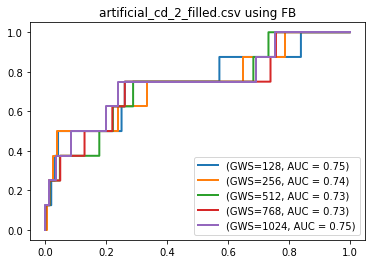

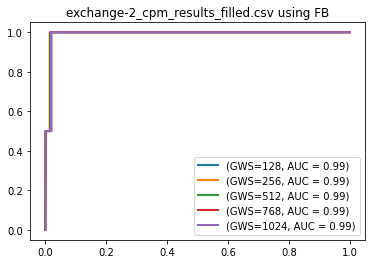

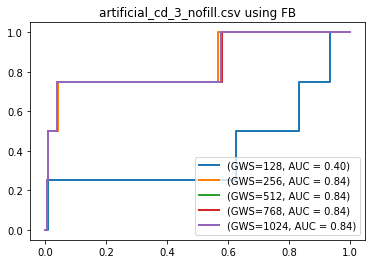

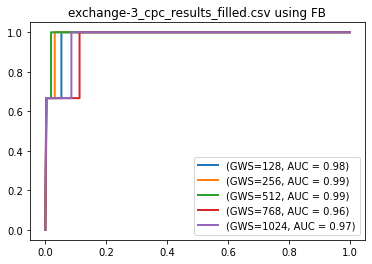

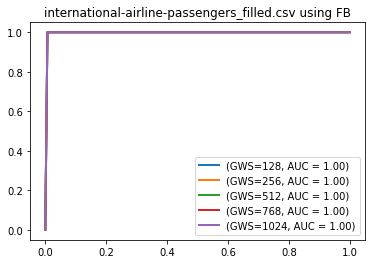

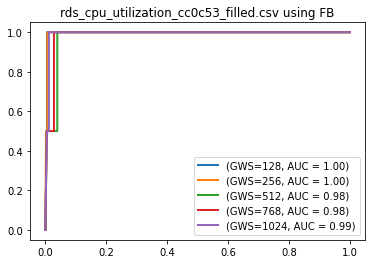

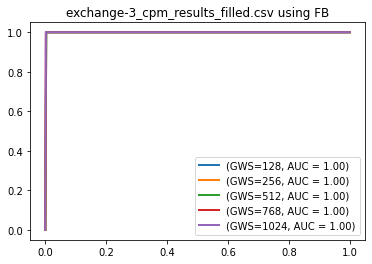

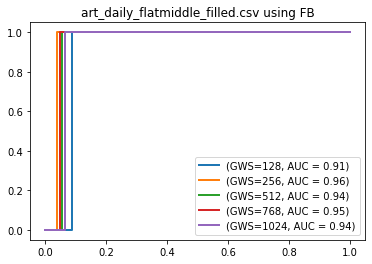

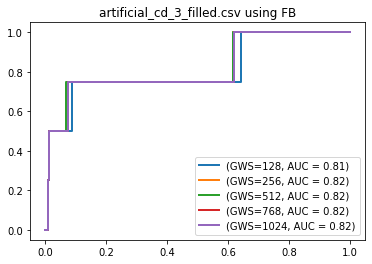

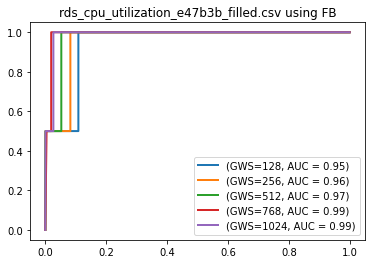

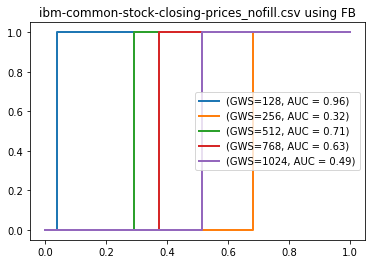

In [3]:
gaussian_window_sizes = [128, 256,512,768,1024]
fb_grid_search_df = pd.read_csv("../jair_work_step_two_grid_search/fb_grid_search_results.csv")

all_roc_auc_dict_list = []

mypath = "../jair_work_step_one_determine_characteristics/"
for f in listdir(mypath):
    roc_auc_dict_list = []
    score_number = 0
    for gaussian_window_size in gaussian_window_sizes:
        if "ts_object" in f:
            ts = joblib.load(mypath + f)


            # parameter section
            best_df = fb_grid_search_df.loc[[fb_grid_search_df.loc[fb_grid_search_df["TS Name"] == ts.name, 'RMSE'].idxmin()]]
            seasonality_prior_scale = best_df["seasonality_prior_scales"].values[0]
            changepoint_prior_scale = best_df["changepoint_prior_scales"].values[0]
            seasonality_mode = best_df["seasonality_modes"].values[0]



            name = ts.name
            result_dict = joblib.load("../jair_work_step_three_anomaly_detection/fb_scores/fbprophet_scores_" + str(score_number) + "_gaussian_window_" + str(gaussian_window_size) + "_" +  name + "_seasonality_prior_scale_" + str(seasonality_prior_scale) + "_changepoint_prior_scale_" + str(changepoint_prior_scale) + "_seasonality_mode_" + seasonality_mode )

            scores = [0 if math.isnan(x) else float(x) for x in result_dict["Anomaly Scores"]]
            y = [0 if math.isnan(x) else int(x) for x in ts.dataframe["outlier"].values]

            fpr, tpr, thresholds = roc_curve(y, scores, pos_label=1)

            roc_auc = auc(fpr, tpr)

            roc_auc_dict = {"Gaussian Window Size": gaussian_window_size,"TS Name": ts.name, "FPRS": fpr, "TPRS": tpr, "Thresholds": thresholds, "AUC": roc_auc, "Dict Name": "prophet_roc_auc_" + str(score_number) + "_gaussian_window_" + str(gaussian_window_size) + "_" +  name + "_seasonality_prior_scale_" + str(seasonality_prior_scale) + "_changepoint_prior_scale_" + str(changepoint_prior_scale) + "_seasonality_mode_" + seasonality_mode }
            roc_auc_dict_name = roc_auc_dict["Dict Name"]

            roc_auc_dict_list.append(roc_auc_dict)
    if roc_auc_dict_list:

        for roc_auc_dict in roc_auc_dict_list:
            fpr = roc_auc_dict["FPRS"]
            tpr = roc_auc_dict["TPRS"]
            roc_auc = roc_auc_dict["AUC"]
            gws = roc_auc_dict["Gaussian Window Size"]
            plt.plot(fpr, tpr,lw=2, label='(GWS=' + str(gws) + ', AUC = %0.2f)' % roc_auc)
        plt.title(name + " using FB")
        plt.legend()
        if ts.name == "exchange-3_cpc_results_nofill.csv":
            plt.savefig("fb_far_auc.eps", format="eps")
        if ts.name == "artificial_cd_2_filled.csv":
            plt.savefig("fb_close_auc.eps", format="eps")
        plt.show()
        
        all_roc_auc_dict_list.append(roc_auc_dict_list)


In [4]:
gaussian_window_size_differences = []


for roc_auc_dict_list in all_roc_auc_dict_list:
    aucs = []
    for roc_auc_dict in roc_auc_dict_list:
        aucs.append(roc_auc_dict["AUC"])

    combos = list(itertools.combinations(aucs, 2))
    
    for combo in combos:
        gaussian_window_size_differences.append(abs(combo[1]-combo[0]))

print("Variance of AUC differences due to Gaussian Window Size Changes: ", statistics.variance(gaussian_window_size_differences))

print("Coefficient of Variation on AUC differences due to Gaussian Window Size Changes: ", scipy.stats.variation(gaussian_window_size_differences))

methods.append("Prophet")
variance_differences.append(statistics.variance(gaussian_window_size_differences))
cv.append(statistics.variance(gaussian_window_size_differences))

Variance of AUC differences due to Gaussian Window Size Changes:  0.023166133555662383
Coefficient of Variation on AUC differences due to Gaussian Window Size Changes:  2.389417464201589


## GLiM

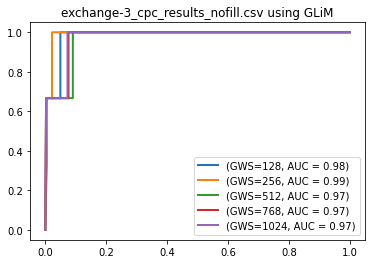

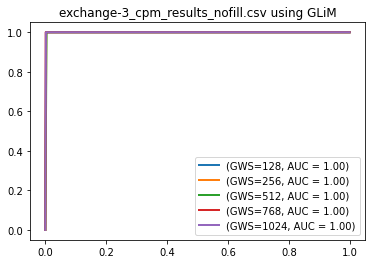

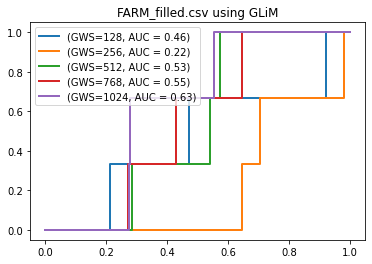

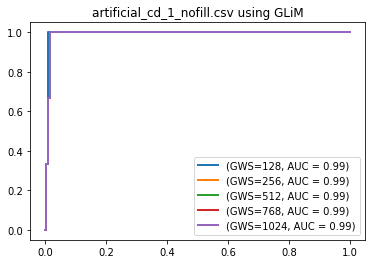

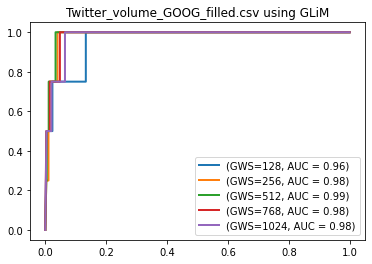

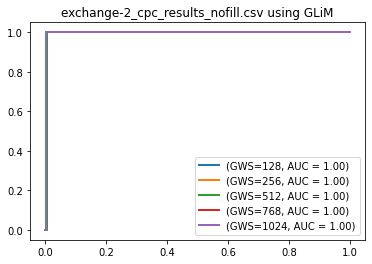

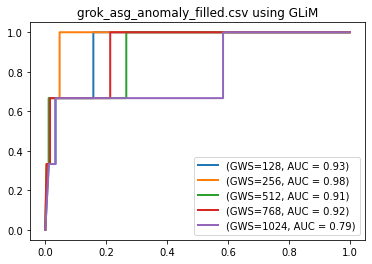

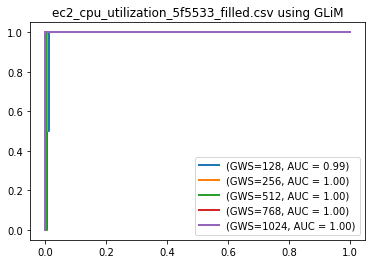

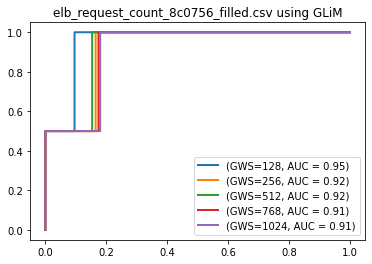

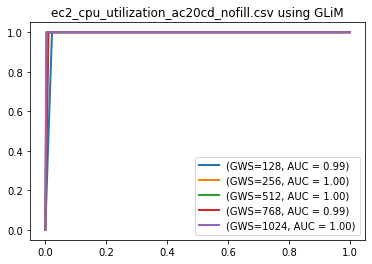

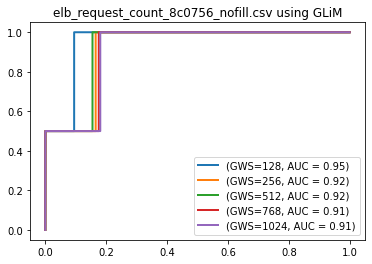

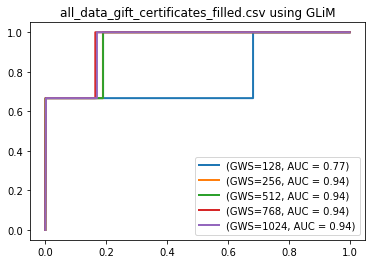

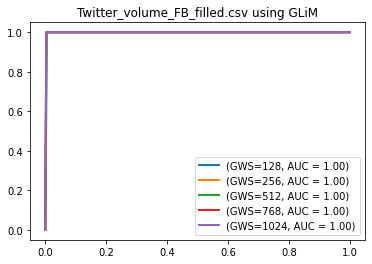

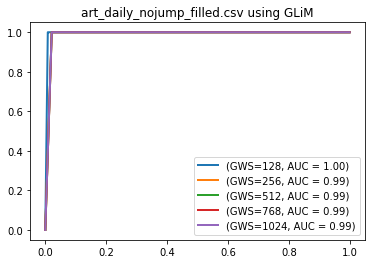

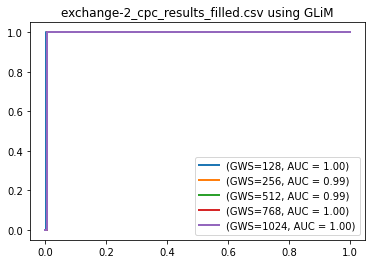

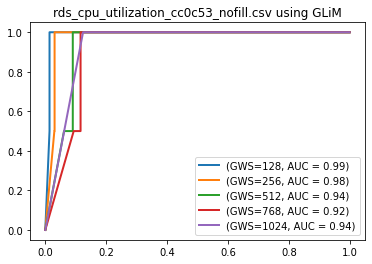

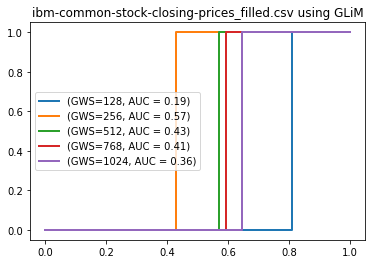

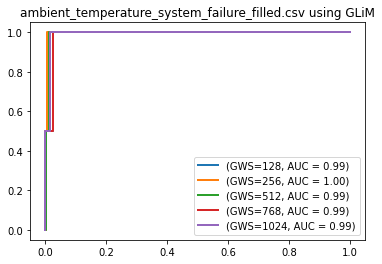

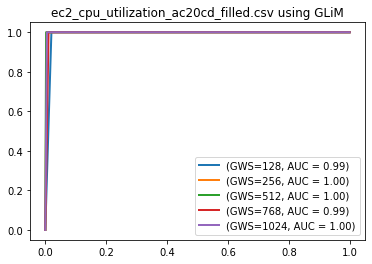

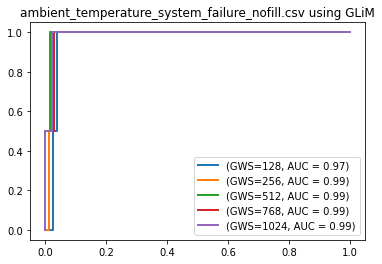

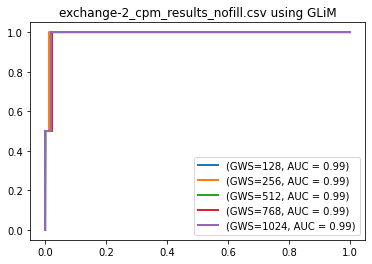

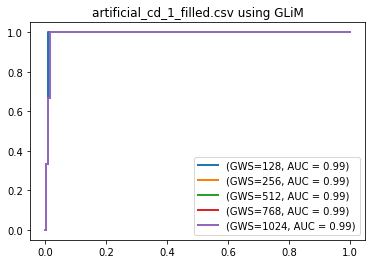

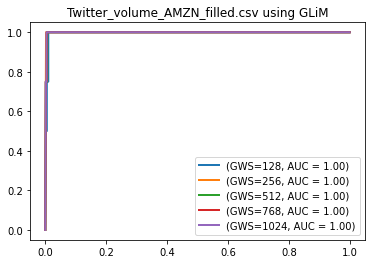

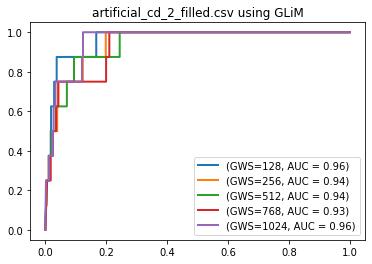

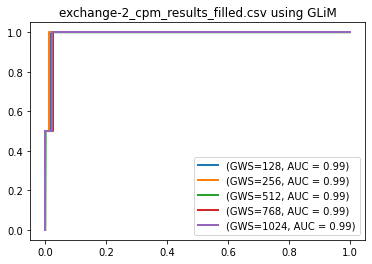

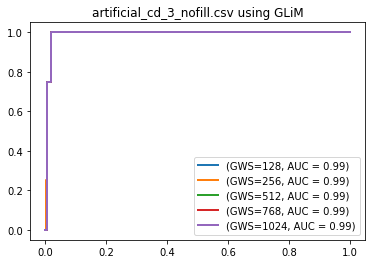

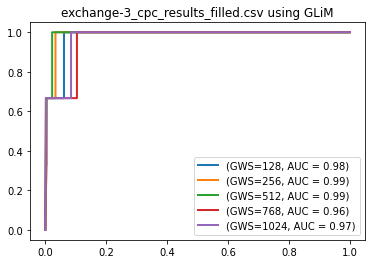

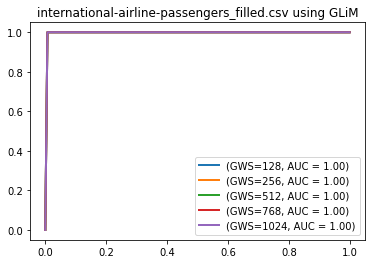

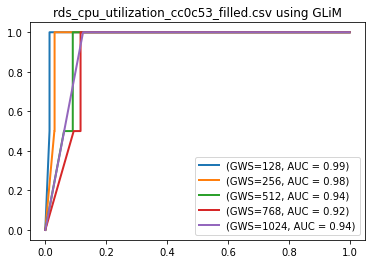

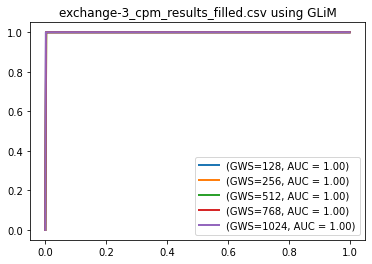

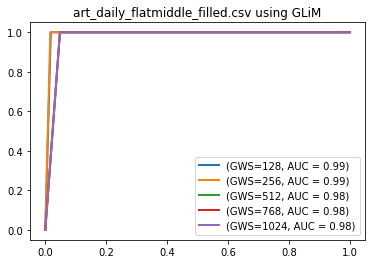

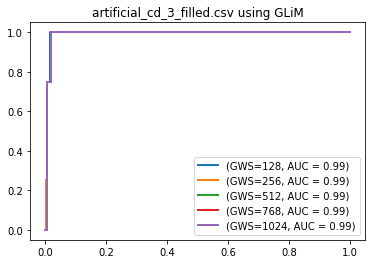

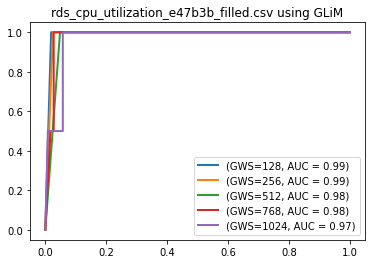

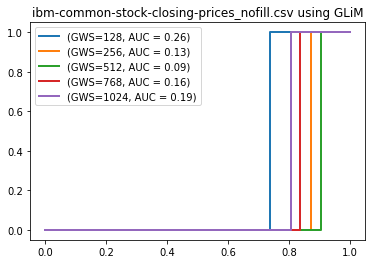

In [5]:


gaussian_window_sizes = [128, 256,512,768,1024]
glim_grid_search_df = pd.read_csv("../jair_work_step_two_grid_search/glim_grid_search_results.csv")
all_roc_auc_dict_list = []

mypath = "../jair_work_step_one_determine_characteristics/"
for f in listdir(mypath):
    roc_auc_dict_list = []
    score_number=0
    for gaussian_window_size in gaussian_window_sizes:
        if "ts_object" in f:
            ts = joblib.load(mypath + f)

            # parameter section
            best_df = glim_grid_search_df.loc[[glim_grid_search_df.loc[glim_grid_search_df["TS Name"] == ts.name, 'RMSE'].idxmin()]]
            lambda_ = best_df["Lambda"].values[0]
            eta = best_df["Eta"].values[0]
            family = best_df["Family"].values[0]



            name = ts.name
            result_dict = joblib.load("../jair_work_step_three_anomaly_detection/glim_scores/glim_scores_" + str(score_number) + "_gaussian_window_" + str(gaussian_window_size) + "_" + name + "_lambda_" + str(lambda_) + "_eta_" + str(eta) + "_family_" + family)

            scores = [0 if math.isnan(x) else float(x) for x in result_dict["Anomaly Scores"]]
            y = [0 if math.isnan(x) else int(x) for x in ts.dataframe["outlier"].values]

            fpr, tpr, thresholds = roc_curve(y, scores, pos_label=1)

            roc_auc = auc(fpr, tpr)

            roc_auc_dict = {"Gaussian Window Size": gaussian_window_size,"TS Name": ts.name, "FPRS": fpr, "TPRS": tpr, "Thresholds": thresholds, "AUC": roc_auc, "Dict Name": "glim_roc_auc_" + str(score_number) + "_gaussian_window_" + str(gaussian_window_size) + "_" + name + "_lambda_" + str(lambda_) + "_eta_" + str(eta) + "_family_" + family}
            roc_auc_dict_name = roc_auc_dict["Dict Name"]
            roc_auc_dict_list.append(roc_auc_dict)
    
    if roc_auc_dict_list:

        for roc_auc_dict in roc_auc_dict_list:
            fpr = roc_auc_dict["FPRS"]
            tpr = roc_auc_dict["TPRS"]
            roc_auc = roc_auc_dict["AUC"]
            gws = roc_auc_dict["Gaussian Window Size"]
            plt.plot(fpr, tpr,lw=2, label='(GWS=' + str(gws) + ', AUC = %0.2f)' % roc_auc)
        plt.title(name + " using GLiM")
        plt.legend()
        plt.show()
        all_roc_auc_dict_list.append(roc_auc_dict_list)

In [6]:
gaussian_window_size_differences = []


for roc_auc_dict_list in all_roc_auc_dict_list:
    aucs = []
    for roc_auc_dict in roc_auc_dict_list:
        aucs.append(roc_auc_dict["AUC"])

    combos = list(itertools.combinations(aucs, 2))
    
    for combo in combos:
        gaussian_window_size_differences.append(abs(combo[1]-combo[0]))

print("Variance of AUC differences due to Gaussian Window Size Changes: ", statistics.variance(gaussian_window_size_differences))
print("Coefficient of Variation on AUC differences due to Gaussian Window Size Changes: ", scipy.stats.variation(gaussian_window_size_differences))

methods.append("GLiM")
variance_differences.append(statistics.variance(gaussian_window_size_differences))
cv.append(statistics.variance(gaussian_window_size_differences))

Variance of AUC differences due to Gaussian Window Size Changes:  0.0030419866290246397
Coefficient of Variation on AUC differences due to Gaussian Window Size Changes:  2.3234949827604416


## Matrix Profiling

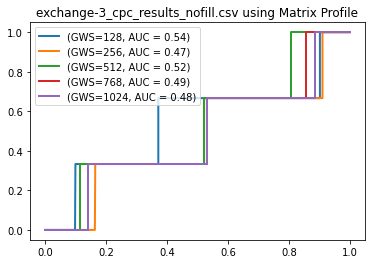

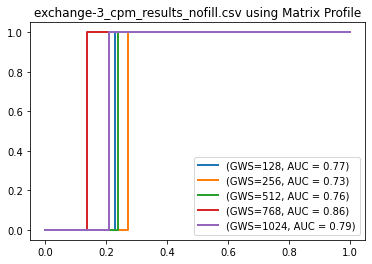

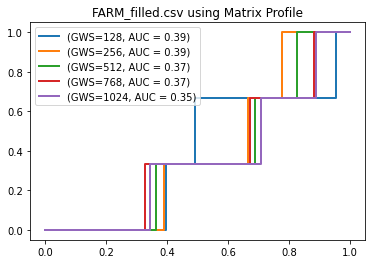

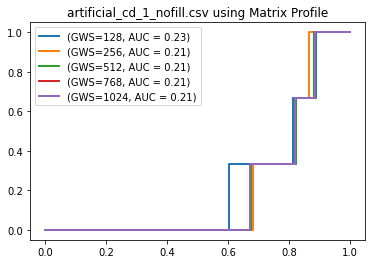

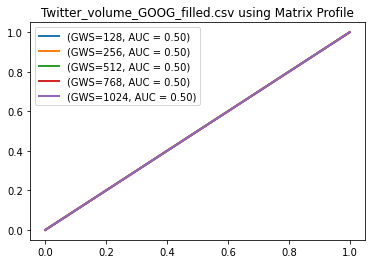

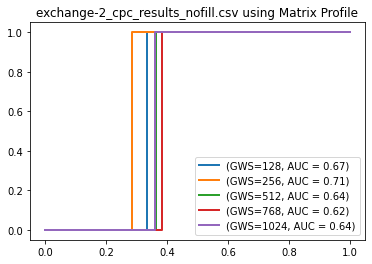

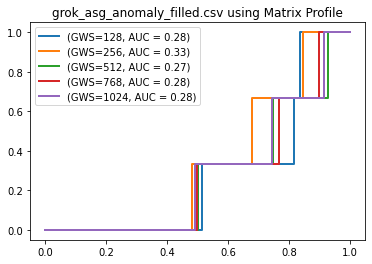

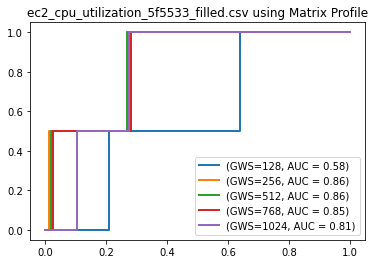

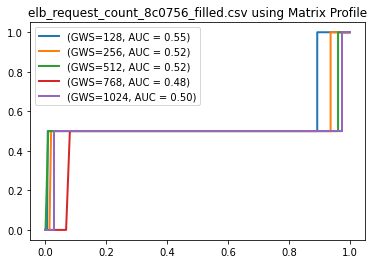

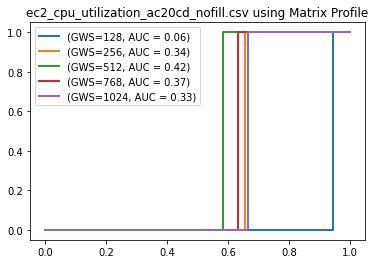

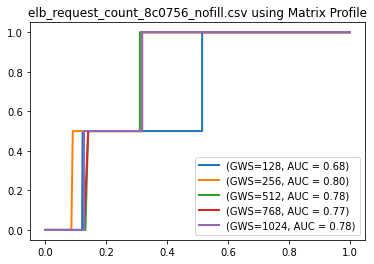

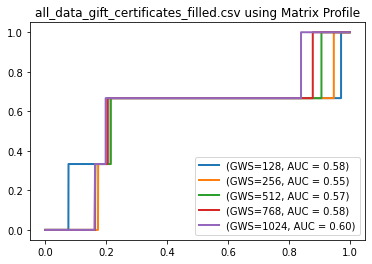

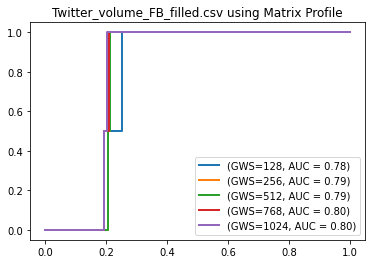

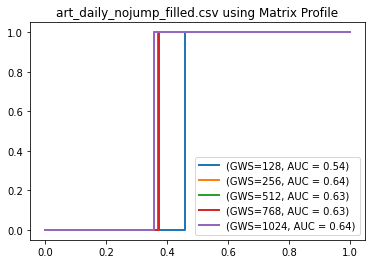

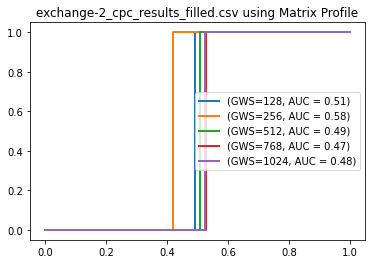

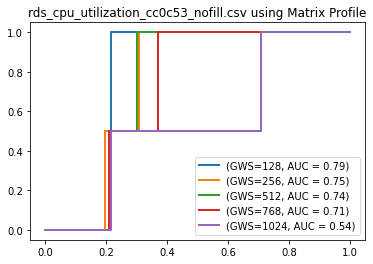

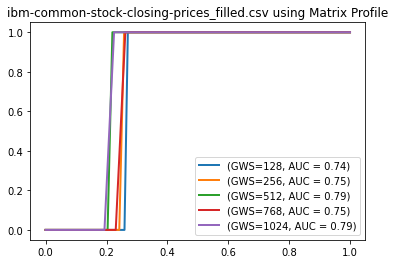

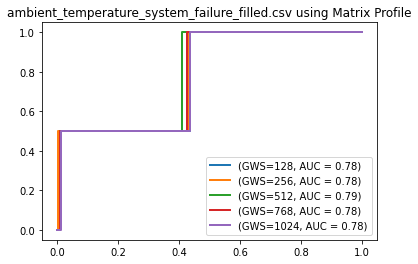

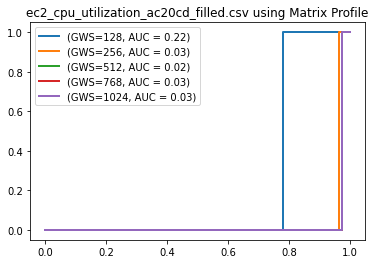

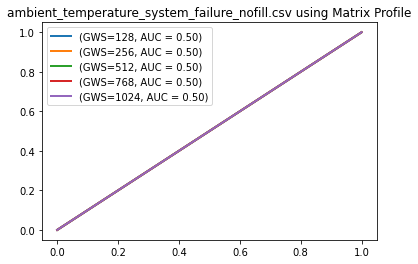

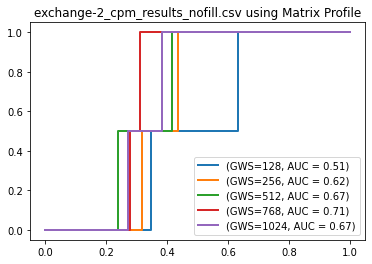

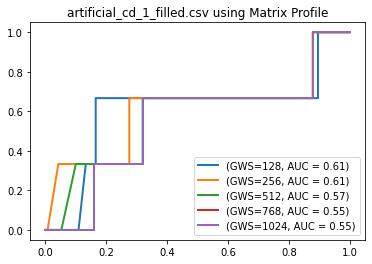

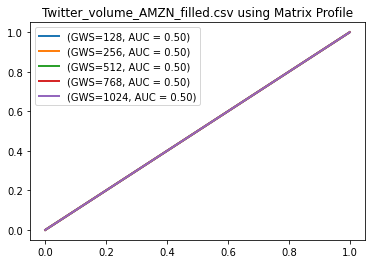

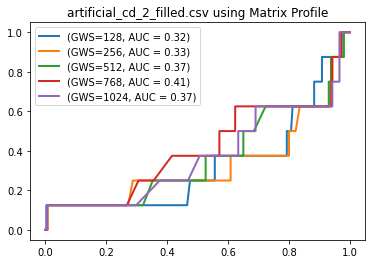

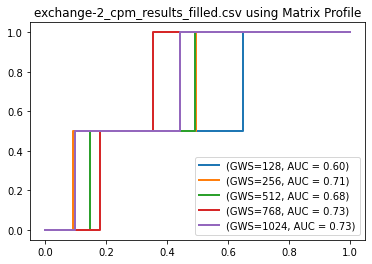

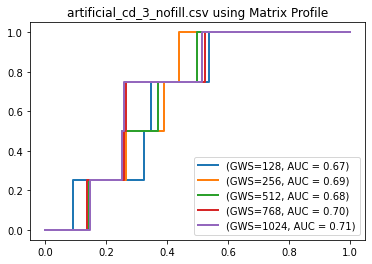

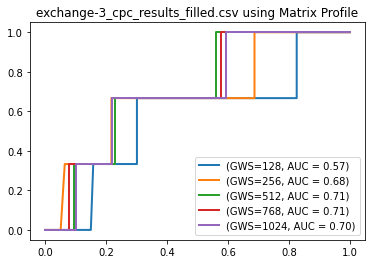

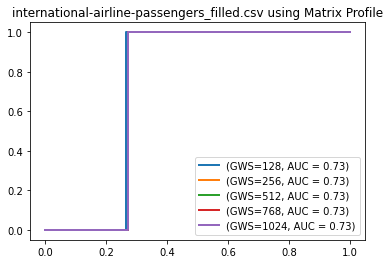

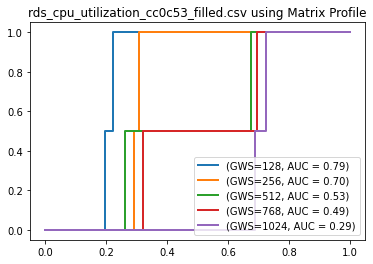

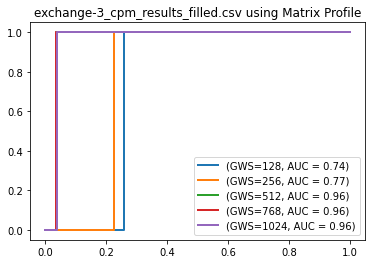

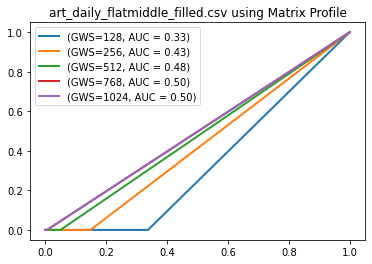

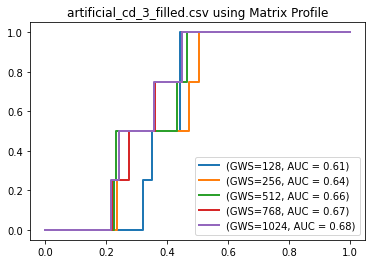

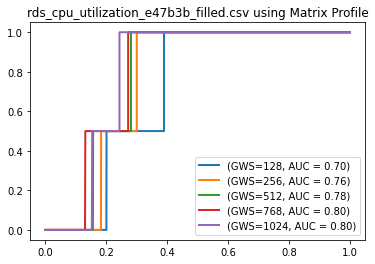

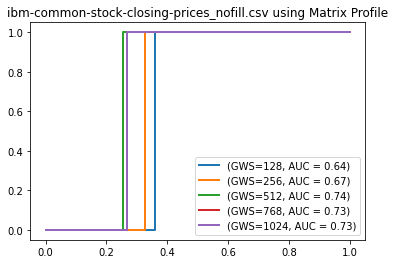

In [7]:
gaussian_window_sizes = [128, 256,512,768,1024]
all_roc_auc_dict_list = []

mypath = "../jair_work_step_one_determine_characteristics/"
for f in listdir(mypath):
    roc_auc_dict_list = []
    score_number=0
    for gaussian_window_size in gaussian_window_sizes:
        if "ts_object" in f:
            ts = joblib.load(mypath + f)

            # parameter section
            if ts.seasonality:
                subseq_len = ts.period
            else:
                subseq_len = 100
            if subseq_len < 5:
                subseq_len = 100

            name = ts.name
            result_dict = joblib.load("../jair_work_step_three_anomaly_detection/matrix_profile_scores/matrix_profile_scores_" + str(score_number) + "_gaussian_window_" + str(gaussian_window_size) + "_" + name + "_subseq_len_" + str(subseq_len))

            scores = [0 if math.isnan(x) else float(x) for x in result_dict["Anomaly Scores"]]
            y = [0 if math.isnan(x) else int(x) for x in ts.dataframe["outlier"].values]

            fpr, tpr, thresholds = roc_curve(y, scores, pos_label=1)

            roc_auc = auc(fpr, tpr)

            roc_auc_dict = {"Gaussian Window Size": gaussian_window_size,"TS Name": ts.name, "FPRS": fpr, "TPRS": tpr, "Thresholds": thresholds, "AUC": roc_auc, "Dict Name": "matrix_profile_roc_auc_" + str(score_number) + "_gaussian_window_" + str(gaussian_window_size) + "_" + name + "_subseq_len_" + str(subseq_len)}
            roc_auc_dict_name = roc_auc_dict["Dict Name"]
            roc_auc_dict_list.append(roc_auc_dict)
    if roc_auc_dict_list:

        for roc_auc_dict in roc_auc_dict_list:
            fpr = roc_auc_dict["FPRS"]
            tpr = roc_auc_dict["TPRS"]
            roc_auc = roc_auc_dict["AUC"]
            gws = roc_auc_dict["Gaussian Window Size"]
            plt.plot(fpr, tpr,lw=2, label='(GWS=' + str(gws) + ', AUC = %0.2f)' % roc_auc)
        plt.title(name + " using Matrix Profile")
        plt.legend()
        plt.show()
        all_roc_auc_dict_list.append(roc_auc_dict_list)


In [8]:
gaussian_window_size_differences = []


for roc_auc_dict_list in all_roc_auc_dict_list:
    aucs = []
    for roc_auc_dict in roc_auc_dict_list:
        aucs.append(roc_auc_dict["AUC"])

    combos = list(itertools.combinations(aucs, 2))
    
    for combo in combos:
        gaussian_window_size_differences.append(abs(combo[1]-combo[0]))

print("Variance of AUC differences due to Gaussian Window Size Changes: ", statistics.variance(gaussian_window_size_differences))
print("Coefficient of Variation on AUC differences due to Gaussian Window Size Changes: ", scipy.stats.variation(gaussian_window_size_differences))
methods.append("Matrix Profile")
variance_differences.append(statistics.variance(gaussian_window_size_differences))
cv.append(statistics.variance(gaussian_window_size_differences))

Variance of AUC differences due to Gaussian Window Size Changes:  0.005400823118597457
Coefficient of Variation on AUC differences due to Gaussian Window Size Changes:  1.3923035467282698


## SARIMAX

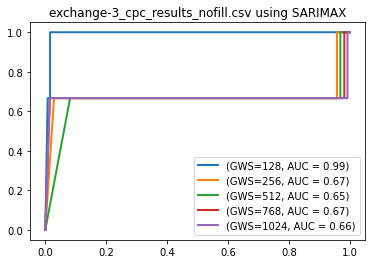

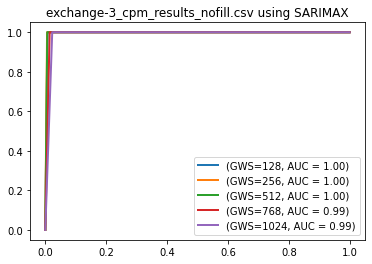

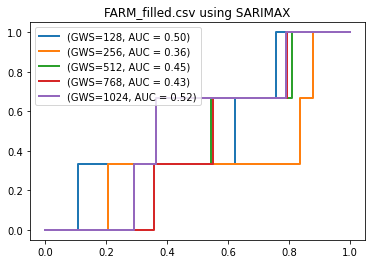

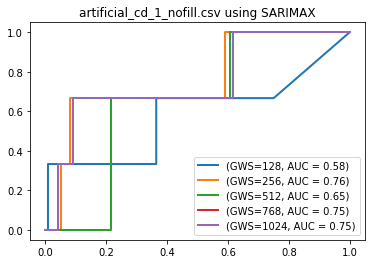

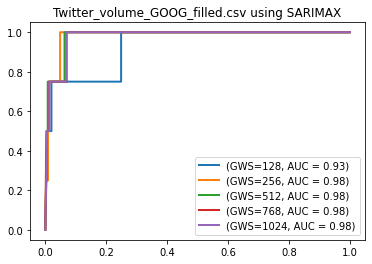

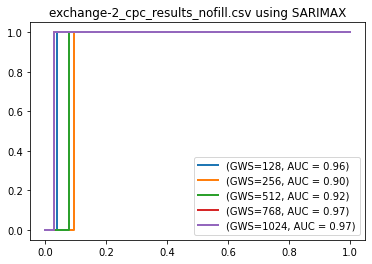

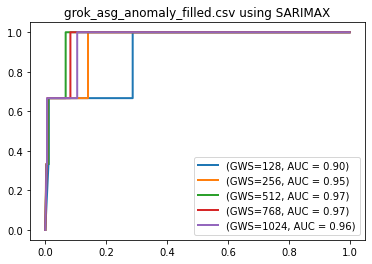

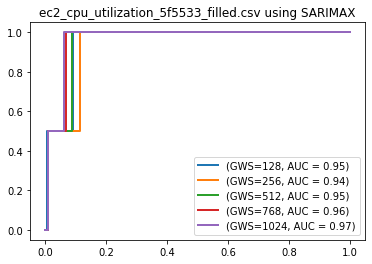

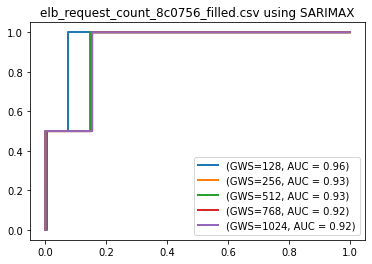

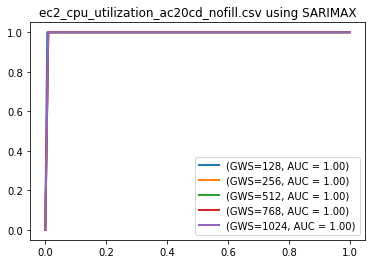

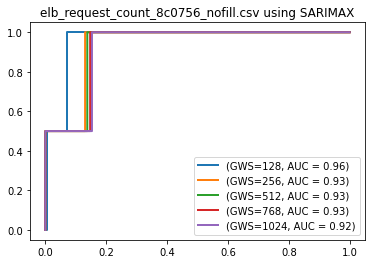

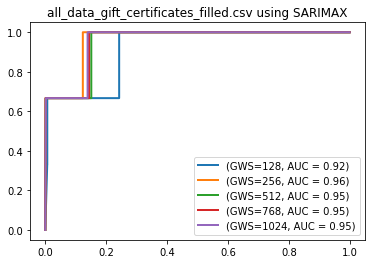

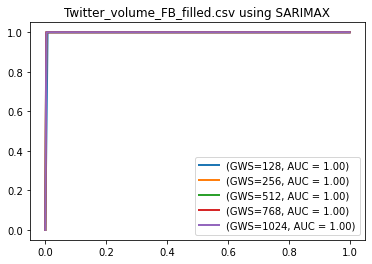

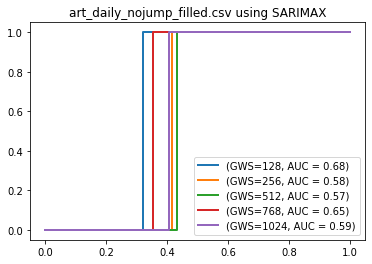

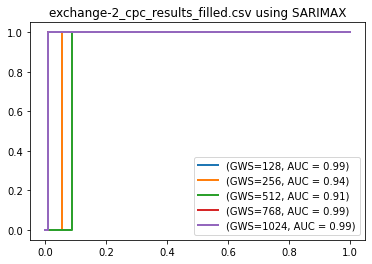

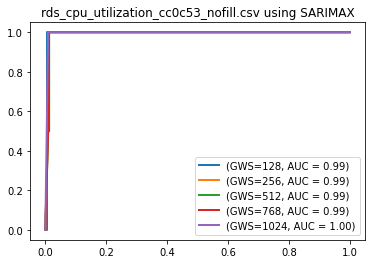

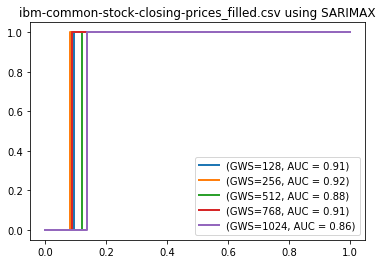

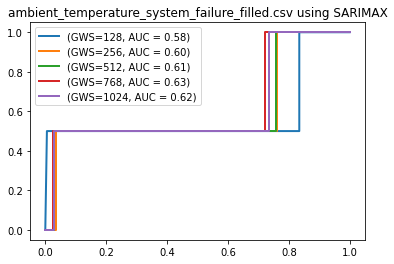

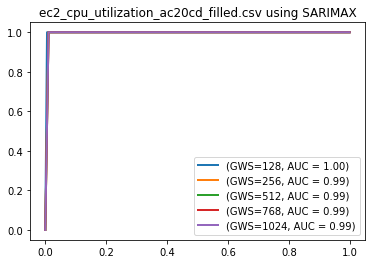

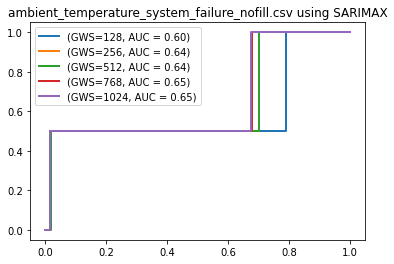

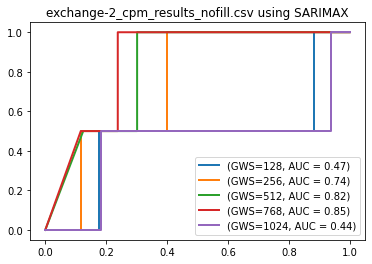

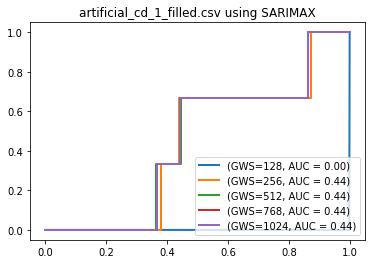

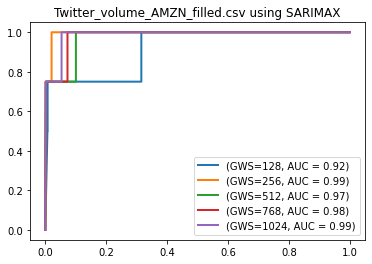

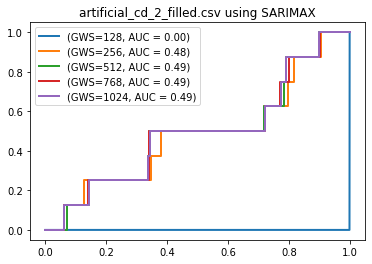

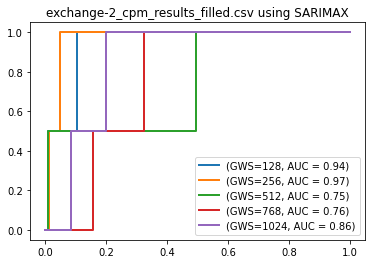

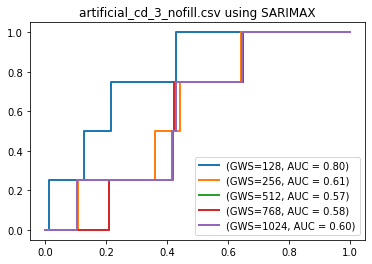

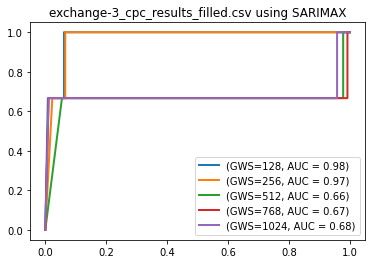

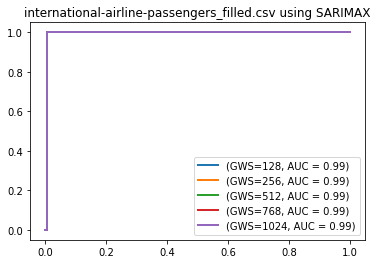

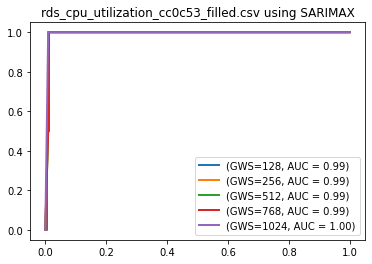

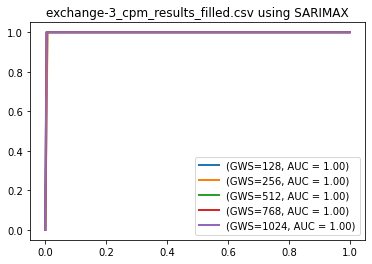

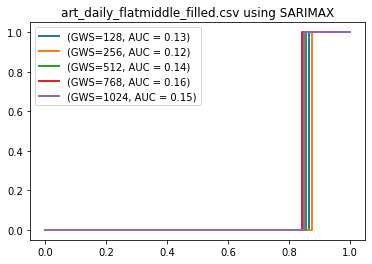

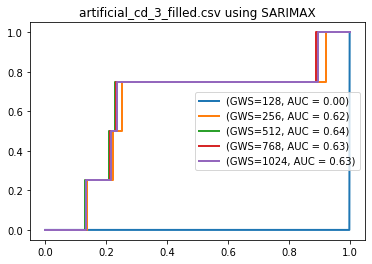

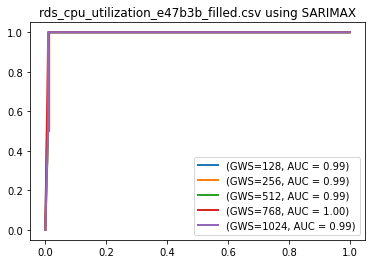

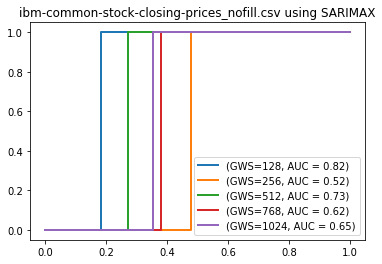

In [9]:
gaussian_window_sizes = [128, 256,512,768,1024]
all_roc_auc_dict_list = []

mypath = "../jair_work_step_one_determine_characteristics/"
for f in listdir(mypath):
    roc_auc_dict_list = []
    score_number = 0
    for gaussian_window_size in gaussian_window_sizes:
        step_size = int(gaussian_window_size/2)
        if "ts_object" in f:
            ts = joblib.load(mypath + f)


            name = ts.name
            result_dict = joblib.load("../jair_work_step_three_anomaly_detection/sarimax_scores/sarimax_scores_" + str(score_number) + "_gaussian_window_" + str(gaussian_window_size) + "_" + name + "_step_size_" + str(step_size))

            scores = [0 if math.isnan(x) else float(x) for x in result_dict["Anomaly Scores"]]
            y = [0 if math.isnan(x) else int(x) for x in ts.dataframe["outlier"].values]

            fpr, tpr, thresholds = roc_curve(y, scores, pos_label=1)

            roc_auc = auc(fpr, tpr)

            roc_auc_dict = {"Gaussian Window Size": gaussian_window_size,"TS Name": ts.name, "FPRS": fpr, "TPRS": tpr, "Thresholds": thresholds, "AUC": roc_auc, "Dict Name": "sarimax_roc_auc_" + str(score_number) + "_gaussian_window_" + str(gaussian_window_size) + "_" + name + "_step_size_" + str(step_size)}
            roc_auc_dict_name = roc_auc_dict["Dict Name"]
            roc_auc_dict_list.append(roc_auc_dict)

    if roc_auc_dict_list:

        for roc_auc_dict in roc_auc_dict_list:
            fpr = roc_auc_dict["FPRS"]
            tpr = roc_auc_dict["TPRS"]
            roc_auc = roc_auc_dict["AUC"]
            gws = roc_auc_dict["Gaussian Window Size"]
            plt.plot(fpr, tpr,lw=2, label='(GWS=' + str(gws) + ', AUC = %0.2f)' % roc_auc)
        plt.title(name + " using SARIMAX")
        plt.legend()
        plt.show()
        all_roc_auc_dict_list.append(roc_auc_dict_list)

In [10]:
gaussian_window_size_differences = []


for roc_auc_dict_list in all_roc_auc_dict_list:
    aucs = []
    for roc_auc_dict in roc_auc_dict_list:
        aucs.append(roc_auc_dict["AUC"])

    combos = list(itertools.combinations(aucs, 2))
    
    for combo in combos:
        gaussian_window_size_differences.append(abs(combo[1]-combo[0]))

print("Variance of AUC differences due to Gaussian Window Size Changes: ", statistics.variance(gaussian_window_size_differences))
print("Coefficient of Variation on AUC differences due to Gaussian Window Size Changes: ", scipy.stats.variation(gaussian_window_size_differences))

methods.append("SARIMAX")
variance_differences.append(statistics.variance(gaussian_window_size_differences))
cv.append(statistics.variance(gaussian_window_size_differences))

Variance of AUC differences due to Gaussian Window Size Changes:  0.014122214722610328
Coefficient of Variation on AUC differences due to Gaussian Window Size Changes:  1.9036824077161552


## STL

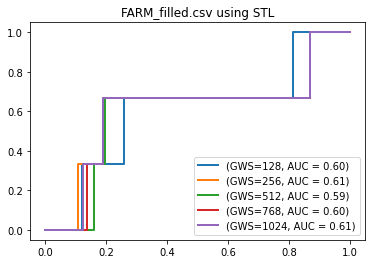

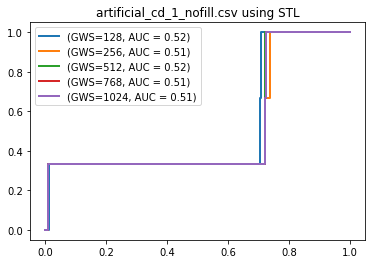

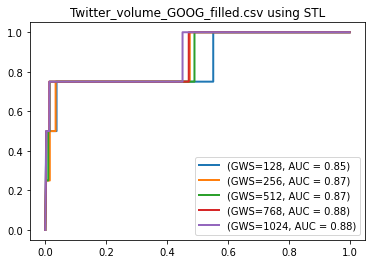

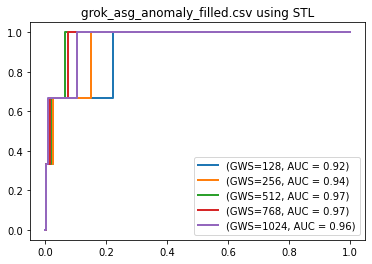

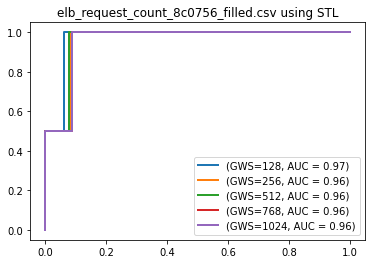

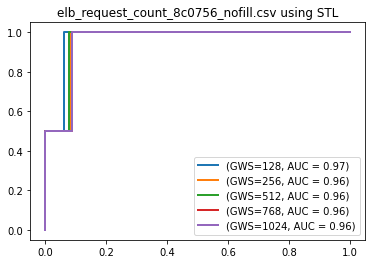

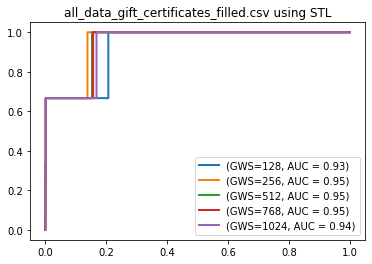

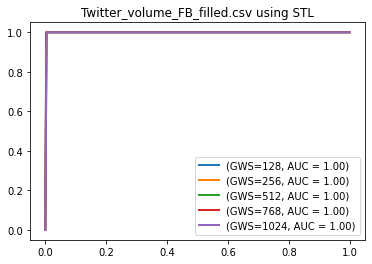

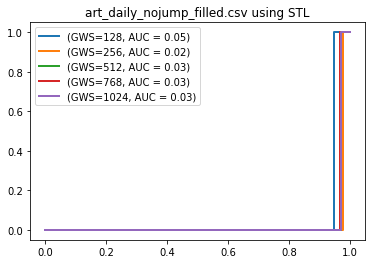

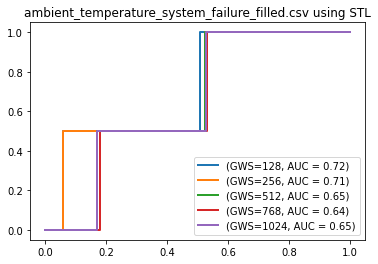

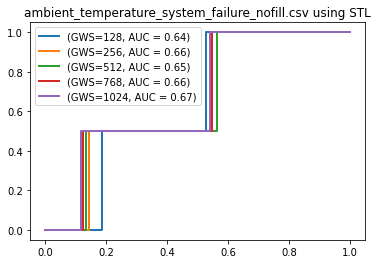

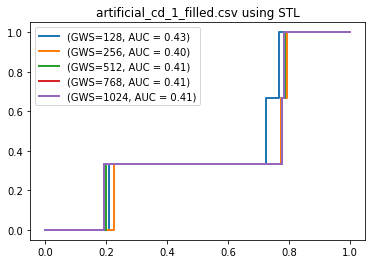

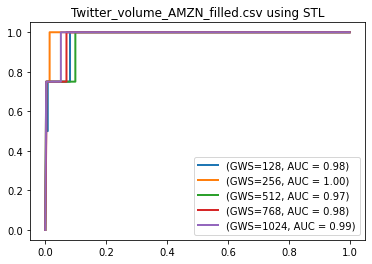

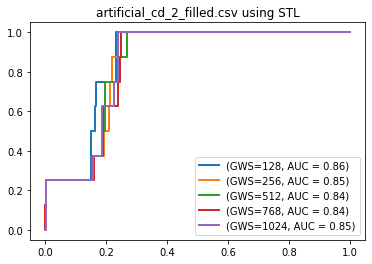

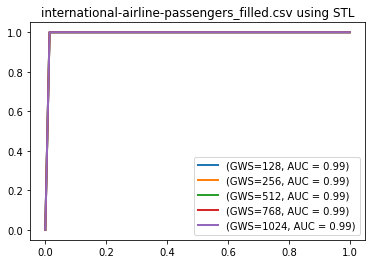

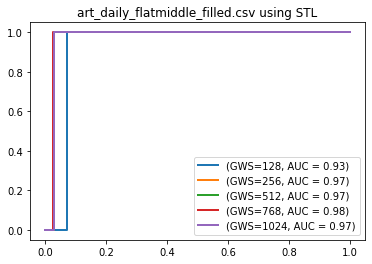

In [11]:
gaussian_window_sizes = [128, 256,512,768,1024]
stl_grid_search_df = pd.read_csv("../jair_work_step_two_grid_search/stl_grid_search_results.csv")
all_roc_auc_dict_list = []

mypath = "../jair_work_step_one_determine_characteristics/"
for f in listdir(mypath):
    roc_auc_dict_list = []
    score_number=0
    for gaussian_window_size in gaussian_window_sizes:
        step_size = int(gaussian_window_size/2)
        if "ts_object" in f:
            ts = joblib.load(mypath + f)

            if ts.get_period() >= 4:
                best_df = stl_grid_search_df.loc[[stl_grid_search_df.loc[stl_grid_search_df["TS Name"] == ts.name, 'RMSE'].idxmin()]]

                # print(ts.name)
                swindow = int(best_df["swindows"].values[0])
                sdegree = best_df["sdegrees"].values[0]
                twindow = best_df["twindows"].values[0]
                tdegree = best_df["tdegrees"].values[0]
                inner = best_df["inners"].values[0]
                outer = best_df["outers"].values[0]

                name = ts.name
                result_dict = joblib.load("../jair_work_step_three_anomaly_detection/stl_scores/stl_scores_" + str(score_number) + "_gaussian_window_" + str(gaussian_window_size) + "_" +  name + "_swindow_" + str(swindow) + "_sdegree_" + str(sdegree) + "_twindow_" + str(twindow) + "_tdegree_" + str(tdegree) +  "_inner_" + str(inner) + "_outer_" + str(outer))

                scores = [0 if math.isnan(x) else float(x) for x in result_dict["Anomaly Scores"]]
                y = [0 if math.isnan(x) else int(x) for x in ts.dataframe["outlier"].values]

                fpr, tpr, thresholds = roc_curve(y, scores, pos_label=1)

                roc_auc = auc(fpr, tpr)

                roc_auc_dict = {"Gaussian Window Size": gaussian_window_size,"TS Name": ts.name, "FPRS": fpr, "TPRS": tpr, "Thresholds": thresholds, "AUC": roc_auc, "Dict Name": "stl_roc_auc_" + str(score_number) + "_gaussian_window_" + str(gaussian_window_size) + "_" +  name + "_swindow_" + str(swindow) + "_sdegree_" + str(sdegree) + "_twindow_" + str(twindow) + "_tdegree_" + str(tdegree) +  "_inner_" + str(inner) + "_outer_" + str(outer)}
                roc_auc_dict_name = roc_auc_dict["Dict Name"]
                roc_auc_dict_list.append(roc_auc_dict)
    if roc_auc_dict_list:

        for roc_auc_dict in roc_auc_dict_list:
            fpr = roc_auc_dict["FPRS"]
            tpr = roc_auc_dict["TPRS"]
            roc_auc = roc_auc_dict["AUC"]
            gws = roc_auc_dict["Gaussian Window Size"]
            plt.plot(fpr, tpr,lw=2, label='(GWS=' + str(gws) + ', AUC = %0.2f)' % roc_auc)
        plt.title(name + " using STL")
        plt.legend()
        plt.show()
        all_roc_auc_dict_list.append(roc_auc_dict_list)

In [12]:
gaussian_window_size_differences = []


for roc_auc_dict_list in all_roc_auc_dict_list:
    aucs = []
    for roc_auc_dict in roc_auc_dict_list:
        aucs.append(roc_auc_dict["AUC"])

    combos = list(itertools.combinations(aucs, 2))
    
    for combo in combos:
        gaussian_window_size_differences.append(abs(combo[1]-combo[0]))

print("Variance of AUC differences due to Gaussian Window Size Changes: ", statistics.variance(gaussian_window_size_differences))
print("Coefficient of Variation on AUC differences due to Gaussian Window Size Changes: ", scipy.stats.variation(gaussian_window_size_differences))
methods.append("STL")
variance_differences.append(statistics.variance(gaussian_window_size_differences))
cv.append(statistics.variance(gaussian_window_size_differences))

Variance of AUC differences due to Gaussian Window Size Changes:  0.00022440782854078924
Coefficient of Variation on AUC differences due to Gaussian Window Size Changes:  1.2199314803972394


## VAE

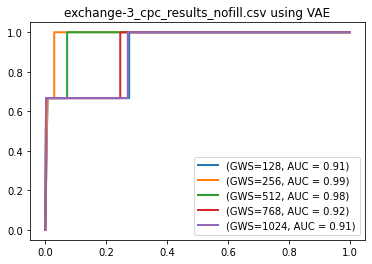

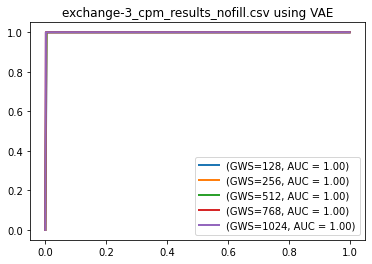

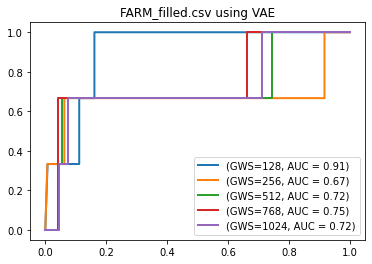

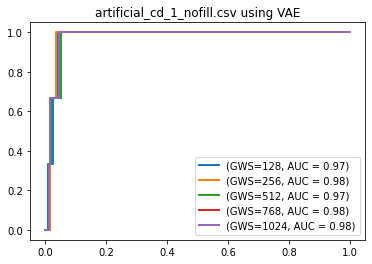

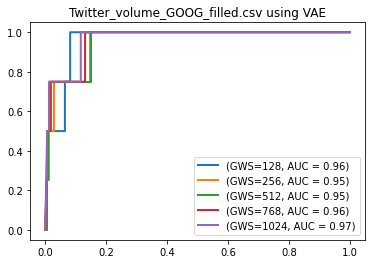

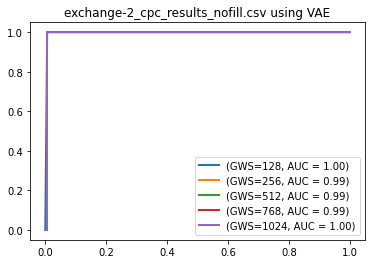

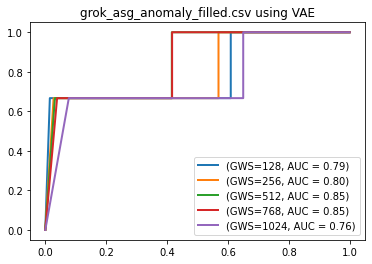

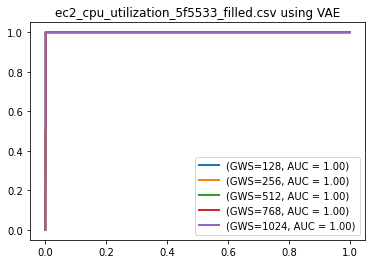

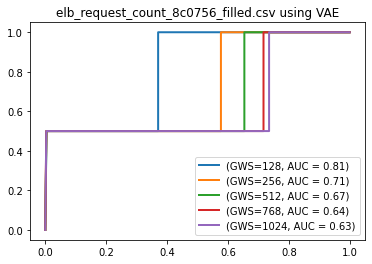

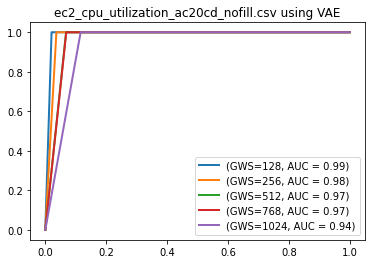

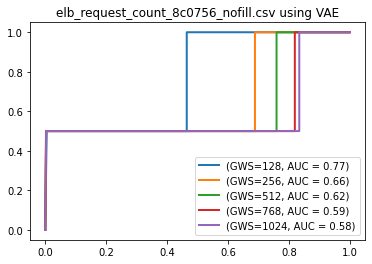

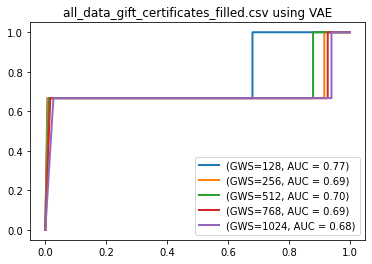

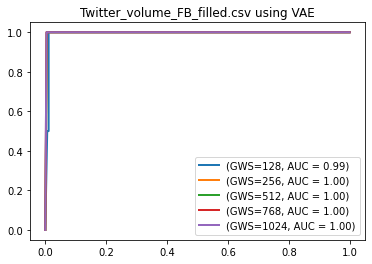

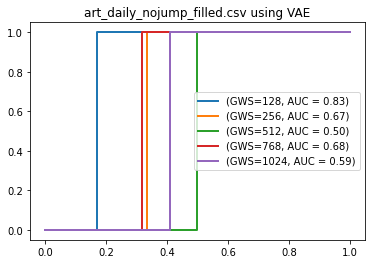

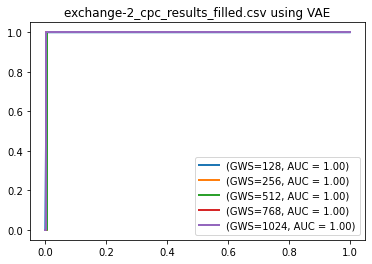

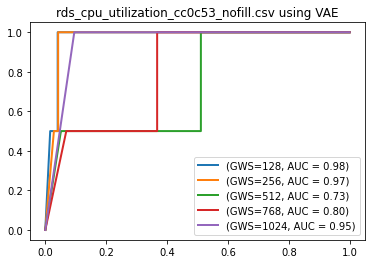

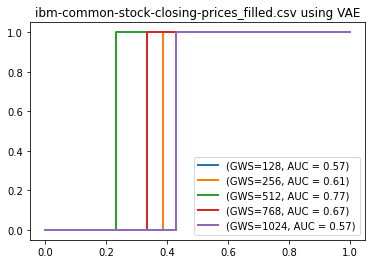

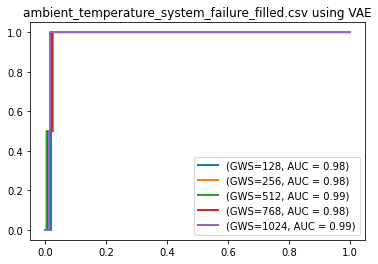

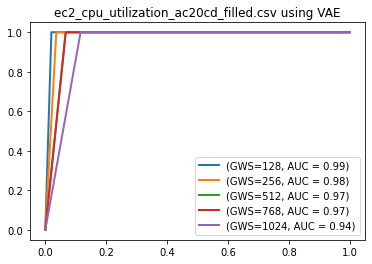

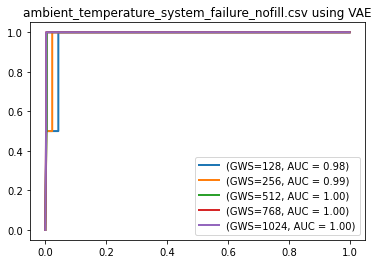

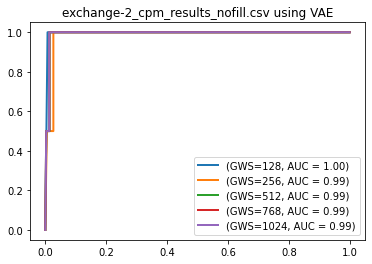

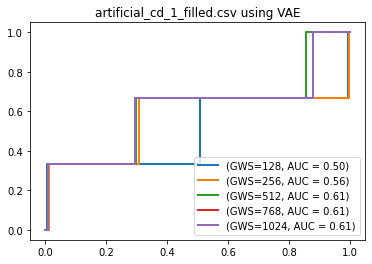

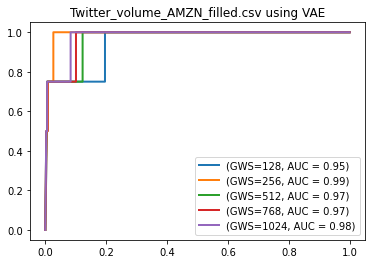

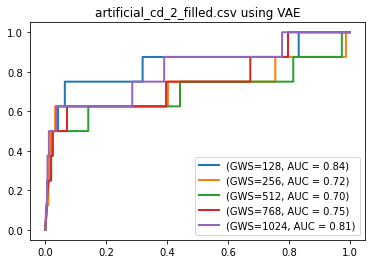

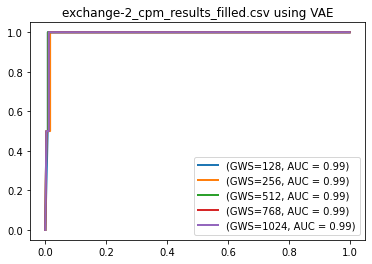

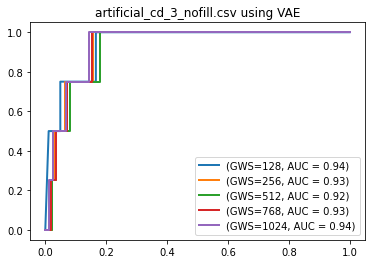

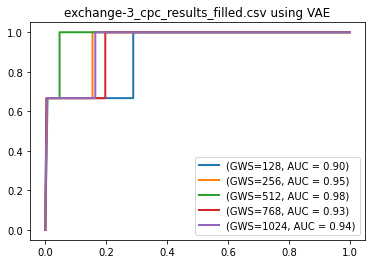

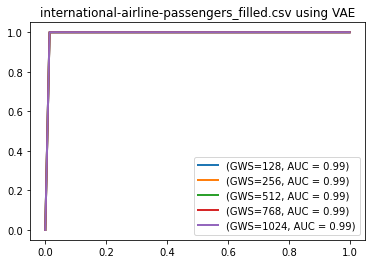

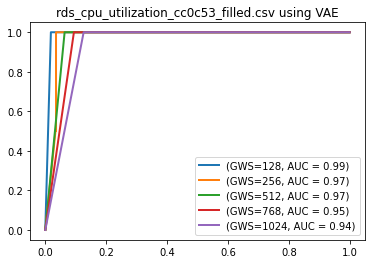

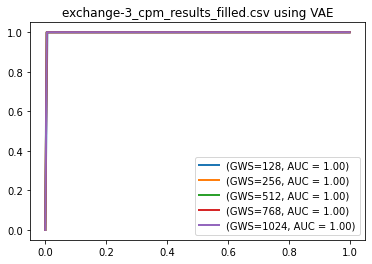

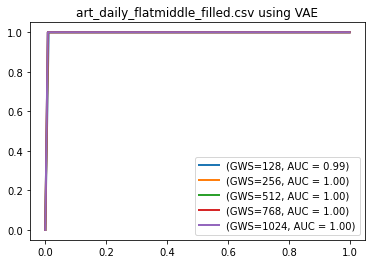

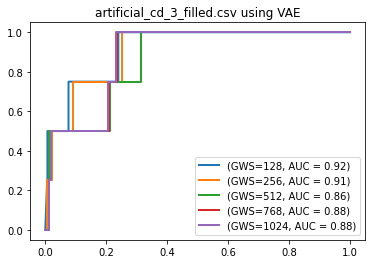

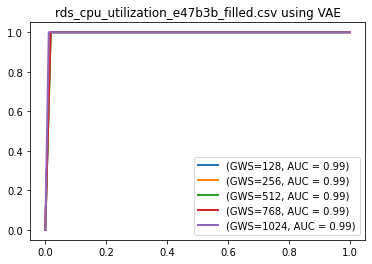

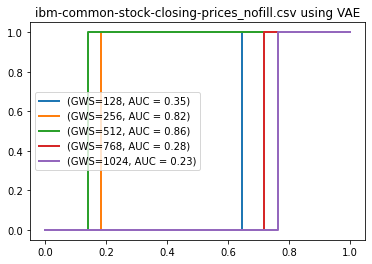

In [13]:
gaussian_window_sizes = [128, 256,512,768,1024]
all_roc_auc_dict_list = []

mypath = "../jair_work_step_one_determine_characteristics/"
for f in listdir(mypath):
    roc_auc_dict_list = []
    score_number=0
    for gaussian_window_size in gaussian_window_sizes:
        if "ts_object" in f:
            ts = joblib.load(mypath + f)

            # parameter section
            window_size = min(120, gaussian_window_size, int(ts.get_length() / 4))
            mcmc_iteration = 10
            latent_dim = 5

            name = ts.name
            result_dict = joblib.load("../jair_work_step_three_anomaly_detection/vae_scores/vae_scores_" + str(score_number) + "_gaussian_window_" + str(gaussian_window_size) + "_" + name + "_window_size_" + str(window_size) + "_mcmc_iteration_" + str(mcmc_iteration) + "_latent_dim_" + str(latent_dim))


            scores = [0 if math.isnan(x) else float(x) for x in result_dict["Anomaly Scores"]]
            y = [0 if math.isnan(x) else int(x) for x in ts.dataframe["outlier"].values]

            fpr, tpr, thresholds = roc_curve(y, scores, pos_label=1)

            roc_auc = auc(fpr, tpr)

            roc_auc_dict = {"Gaussian Window Size": gaussian_window_size,"TS Name": ts.name, "FPRS": fpr, "TPRS": tpr, "Thresholds": thresholds, "AUC": roc_auc, "Dict Name": "vae_roc_auc_" + str(score_number) + "_gaussian_window_" + str(gaussian_window_size) + "_" + name + "_window_size_" + str(window_size) + "_mcmc_iteration_" + str(mcmc_iteration) + "_latent_dim_" + str(latent_dim)}
            roc_auc_dict_name = roc_auc_dict["Dict Name"]
            roc_auc_dict_list.append(roc_auc_dict)
    if roc_auc_dict_list:

        for roc_auc_dict in roc_auc_dict_list:
            fpr = roc_auc_dict["FPRS"]
            tpr = roc_auc_dict["TPRS"]
            roc_auc = roc_auc_dict["AUC"]
            gws = roc_auc_dict["Gaussian Window Size"]
            plt.plot(fpr, tpr,lw=2, label='(GWS=' + str(gws) + ', AUC = %0.2f)' % roc_auc)
        plt.title(name + " using VAE")
        plt.legend()
        plt.show()
        all_roc_auc_dict_list.append(roc_auc_dict_list)

In [14]:
gaussian_window_size_differences = []


for roc_auc_dict_list in all_roc_auc_dict_list:
    aucs = []
    for roc_auc_dict in roc_auc_dict_list:
        aucs.append(roc_auc_dict["AUC"])

    combos = list(itertools.combinations(aucs, 2))
    
    for combo in combos:
        gaussian_window_size_differences.append(abs(combo[1]-combo[0]))

print("Variance of AUC differences due to Gaussian Window Size Changes: ", statistics.variance(gaussian_window_size_differences))
methods.append("VAE")
variance_differences.append(statistics.variance(gaussian_window_size_differences))
cv.append(statistics.variance(gaussian_window_size_differences))

Variance of AUC differences due to Gaussian Window Size Changes:  0.007532734034578588


## Windowed Gaussian

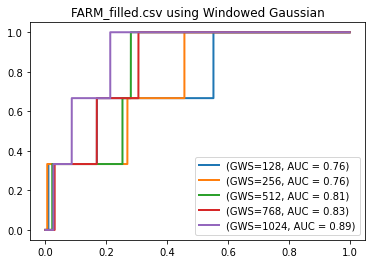

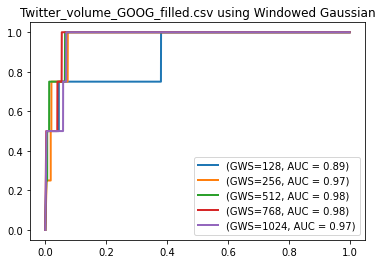

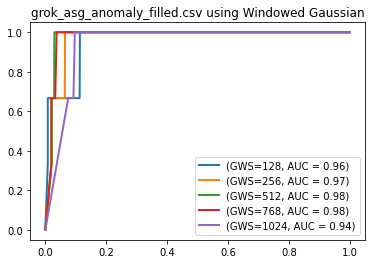

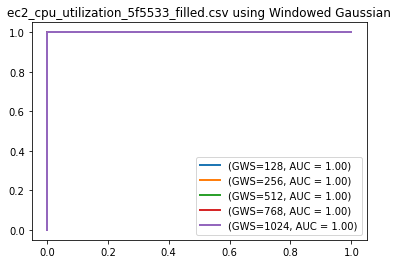

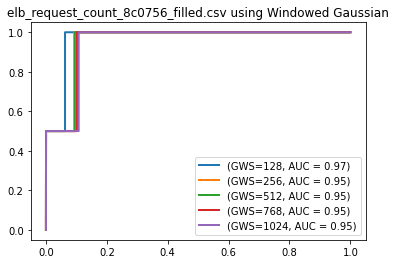

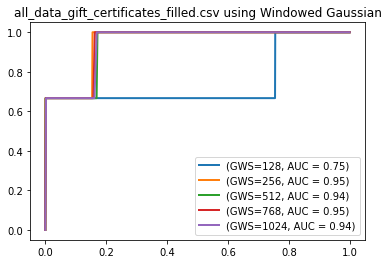

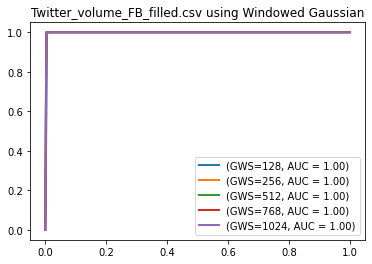

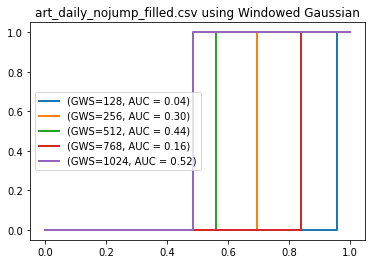

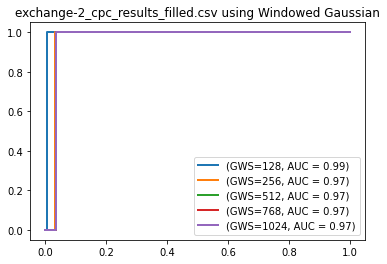

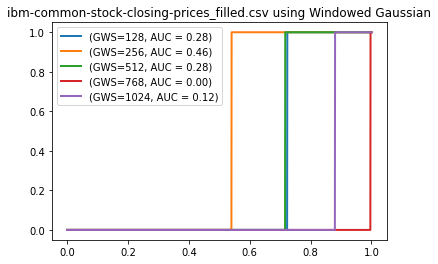

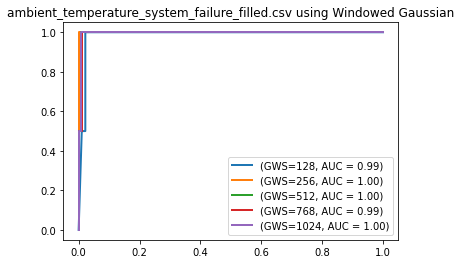

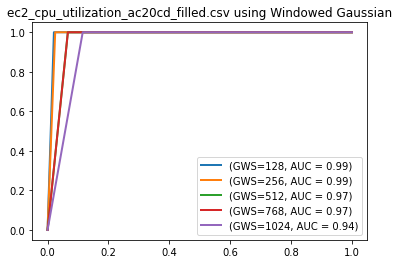

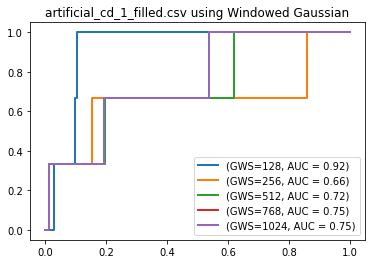

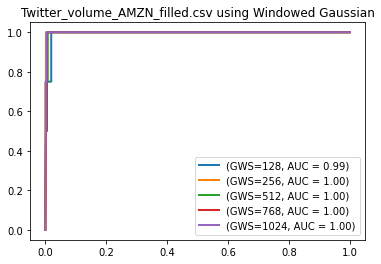

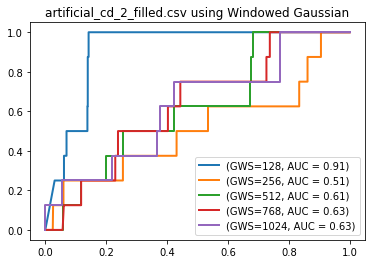

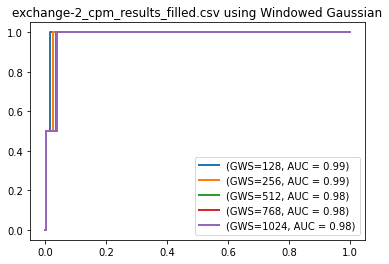

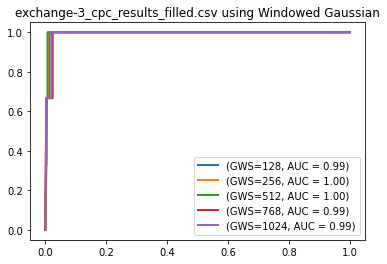

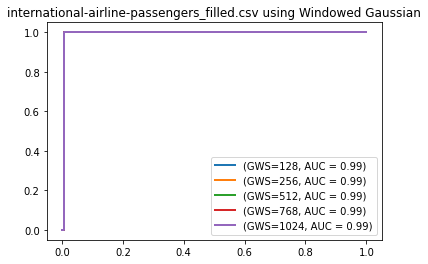

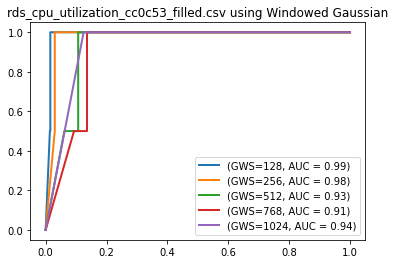

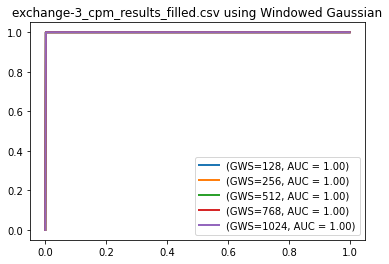

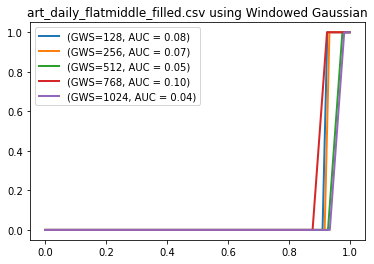

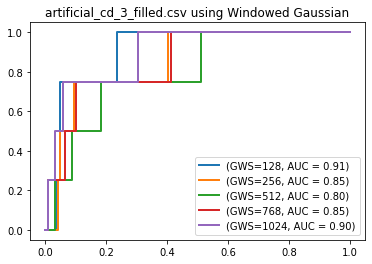

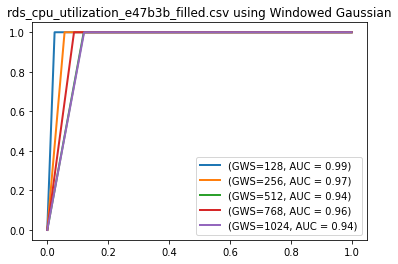

In [15]:
gaussian_window_sizes = [128, 256,512,768,1024]
all_roc_auc_dict_list = []

mypath = "../jair_work_step_one_determine_characteristics/"
for f in listdir(mypath):
    roc_auc_dict_list = []
    score_number=0
    for gaussian_window_size in gaussian_window_sizes:
        if "ts_object" in f:
            ts = joblib.load(mypath + f)
            if not ts.miss:
                step_size = int(gaussian_window_size/2)

                name = ts.name
                result_dict = joblib.load("../jair_work_step_three_anomaly_detection/windowed_gaussian_scores/windowed_gaussian_scores_" + str(score_number) + "_gaussian_window_"+ str(gaussian_window_size) + "_" + name + "_step_size_" + str(step_size))


                scores = [0 if math.isnan(x) else float(x) for x in result_dict["Anomaly Scores"]]
                y = [0 if math.isnan(x) else int(x) for x in ts.dataframe["outlier"].values]

                fpr, tpr, thresholds = roc_curve(y, scores, pos_label=1)

                roc_auc = auc(fpr, tpr)

                roc_auc_dict = {"Gaussian Window Size": gaussian_window_size,"TS Name": ts.name, "FPRS": fpr, "TPRS": tpr, "Thresholds": thresholds, "AUC": roc_auc, "Dict Name": "windowed_gaussian_roc_auc_" + str(score_number) + "_gaussian_window_"+ str(gaussian_window_size) + "_" + name + "_step_size_" + str(step_size)}
                roc_auc_dict_name = roc_auc_dict["Dict Name"]
                roc_auc_dict_list.append(roc_auc_dict)
    if roc_auc_dict_list:

        for roc_auc_dict in roc_auc_dict_list:
            fpr = roc_auc_dict["FPRS"]
            tpr = roc_auc_dict["TPRS"]
            roc_auc = roc_auc_dict["AUC"]
            gws = roc_auc_dict["Gaussian Window Size"]
            plt.plot(fpr, tpr,lw=2, label='(GWS=' + str(gws) + ', AUC = %0.2f)' % roc_auc)
        plt.title(name + " using Windowed Gaussian")
        plt.legend()
        plt.show()
        all_roc_auc_dict_list.append(roc_auc_dict_list)

In [16]:
gaussian_window_size_differences = []


for roc_auc_dict_list in all_roc_auc_dict_list:
    aucs = []
    for roc_auc_dict in roc_auc_dict_list:
        aucs.append(roc_auc_dict["AUC"])

    combos = list(itertools.combinations(aucs, 2))
    
    for combo in combos:
        gaussian_window_size_differences.append(abs(combo[1]-combo[0]))

print("Variance of AUC differences due to Gaussian Window Size Changes: ", statistics.variance(gaussian_window_size_differences))
print("Coefficient of Variation on AUC differences due to Gaussian Window Size Changes: ", scipy.stats.variation(gaussian_window_size_differences))

methods.append("Windowed Gaussian")
variance_differences.append(statistics.variance(gaussian_window_size_differences))
cv.append(statistics.variance(gaussian_window_size_differences))

Variance of AUC differences due to Gaussian Window Size Changes:  0.007735928041841748
Coefficient of Variation on AUC differences due to Gaussian Window Size Changes:  1.751235355588964


In [17]:
methods

['Prophet',
 'GLiM',
 'Matrix Profile',
 'SARIMAX',
 'STL',
 'VAE',
 'Windowed Gaussian']

In [18]:
variance_differences

[0.023166133555662383,
 0.0030419866290246397,
 0.005400823118597457,
 0.014122214722610328,
 0.00022440782854078924,
 0.007532734034578588,
 0.007735928041841748]

In [19]:
cv

[0.023166133555662383,
 0.0030419866290246397,
 0.005400823118597457,
 0.014122214722610328,
 0.00022440782854078924,
 0.007532734034578588,
 0.007735928041841748]

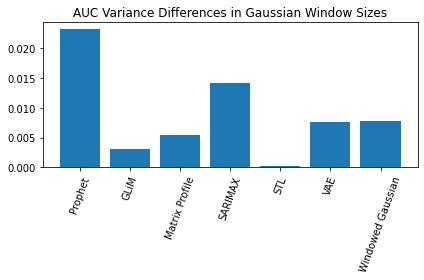

In [20]:
plt.figure()
plt.bar(range(len(variance_differences)),variance_differences)
plt.xticks(range(len(methods)), methods)
plt.xticks(rotation=70)
plt.title("AUC Variance Differences in Gaussian Window Sizes")
plt.tight_layout()
# plt.savefig("auc_variance_differences.eps",format="eps")
plt.show()

In [21]:
# plt.figure()
# plt.bar(range(len(cv)),cv)
# plt.xticks(range(len(methods)), methods)
# plt.xticks(rotation=70)
# plt.title("Coefficient of Variation on AUC Differences in Gaussian Window Sizes")
# plt.tight_layout()
# # plt.savefig("auc_variance_differences.eps",format="eps")
# plt.show()